In [1]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Step 1: Data Loading, Exploration, and Visualization
data = pd.read_csv("/content/50_Startups.csv")

In [3]:
# Check the first few rows of the dataset
print(data.head())

   R&D Spend  Administration  Marketing Spend     Profit
0  165349.20       136897.80        471784.10  192261.83
1  162597.70       151377.59        443898.53  191792.06
2  153441.51       101145.55        407934.54  191050.39
3  144372.41       118671.85        383199.62  182901.99
4  142107.34        91391.77        366168.42  166187.94


In [4]:
# Check for missing values
print(data.isnull().sum())

R&D Spend          0
Administration     0
Marketing Spend    0
Profit             0
dtype: int64


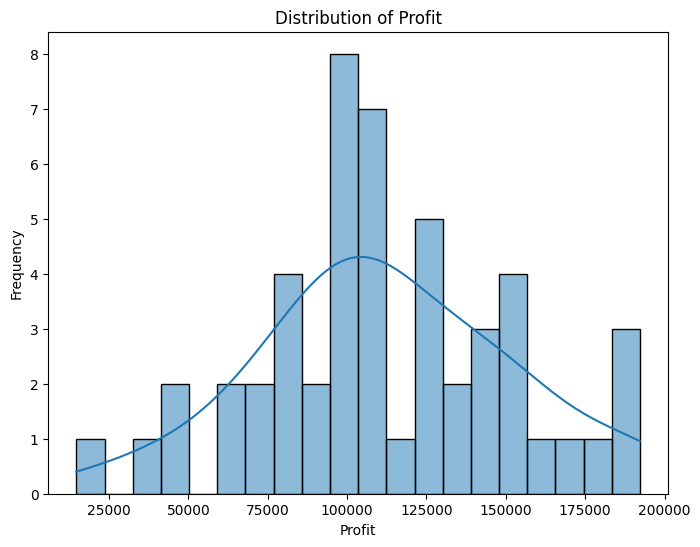

In [5]:
# Visualize the distribution of the target variable
plt.figure(figsize=(8, 6))
sns.histplot(data['Profit'], bins=20, kde=True)
plt.title('Distribution of Profit')
plt.xlabel('Profit')
plt.ylabel('Frequency')
plt.show()

In [6]:
# Separate features (X) and target variable (y)
X = data[['R&D Spend', 'Administration', 'Marketing Spend']]
y = data['Profit']

In [7]:
# Step 2: Model Construction with Hyperparameter Tuning
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Set the hyperparameter grid
param_grid = {
    'learning_rate': [0.1, 0.5, 1],
    'max_depth': [3, 5, 7],
    'n_estimators': [10, 50, 100]
}

In [9]:
# Define the model
model = xgb.XGBRegressor()

In [10]:
# Use GridSearchCV to tune the hyperparameters
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END ....learning_rate=0.1, max_depth=3, n_estimators=10; total time=   0.1s
[CV] END ....learning_rate=0.1, max_depth=3, n_estimators=10; total time=   0.0s
[CV] END ....learning_rate=0.1, max_depth=3, n_estimators=10; total time=   0.0s
[CV] END ....learning_rate=0.1, max_depth=3, n_estimators=10; total time=   0.0s
[CV] END ....learning_rate=0.1, max_depth=3, n_estimators=10; total time=   0.0s
[CV] END ....learning_rate=0.1, max_depth=3, n_estimators=50; total time=   0.0s
[CV] END ....learning_rate=0.1, max_depth=3, n_estimators=50; total time=   0.0s
[CV] END ....learning_rate=0.1, max_depth=3, n_estimators=50; total time=   0.0s
[CV] END ....learning_rate=0.1, max_depth=3, n_estimators=50; total time=   0.0s
[CV] END ....learning_rate=0.1, max_depth=3, n_estimators=50; total time=   0.0s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=100; total time=   0.0s
[CV] END ...learning_rate=0.1, max_depth=3, n_e

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'learning_rate': [0.1, 0.5, 1], 'max_depth': [3, 5, 7],
                         'n_estimators': [10, 50, 100]},
             scoring='neg_mean_squared_error', verbose=2)

In [11]:
# Print the best hyperparameters
print(f'Best learning rate: {grid_search.best_params_["learning_rate"]}')
print(f'Best max depth: {grid_search.best_params_["max_depth"]}')
print(f'Best number of estimators: {grid_search.best_params_["n_estimators"]}')

Best learning rate: 0.5
Best max depth: 3
Best number of estimators: 100


In [12]:
# Train the final model with the best parameters
final_model = xgb.XGBRegressor(**grid_search.best_params_)
final_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.5, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [13]:
# Make predictions on the test set
y_pred = final_model.predict(X_test)


In [14]:
# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 120430121.77978328


In [15]:
import joblib
joblib.dump(final_model, 'final_model.pkl')

['final_model.pkl']

#load the saved model for prediction

In [16]:
loaded_model = joblib.load('/content/final_model.pkl')

In [17]:
new_data = pd.DataFrame({
    'R&D Spend': [120000, 150000],
    'Administration': [130000, 140000],
    'Marketing Spend': [200000, 250000]})

In [19]:
 #Use the loaded model to make predictions on the new data
predictions = loaded_model.predict(new_data)

In [20]:
print("Predicted Profits:")
for pred in predictions:
    print(pred)

Predicted Profits:
138295.52
182553.6
